<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [ ]:
import pandas as pd
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'

df1 = pd.read_excel(url,sheet_name = 0)
date1 = df1.columns[1:]
df1 = df1.transpose()
new_header = df1.iloc[0]
df1 = df1[1:]
df1.columns = new_header
  
df2 = pd.read_excel(url,sheet_name = 1)
date2 = df2.columns[1:]
df2 = df2.transpose()
new_header = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header

## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰값, 작은값의 수의 총합을 `num1`, `num2`에 저장하세요


In [ ]:
#코드 실행 후 런타임 다시 시작하면 한글 글자 깨짐 오류가 해결된다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

df1의 dimension: (8, 32)
df2의 dimension: (8, 32)
num1: 4, num2: 6


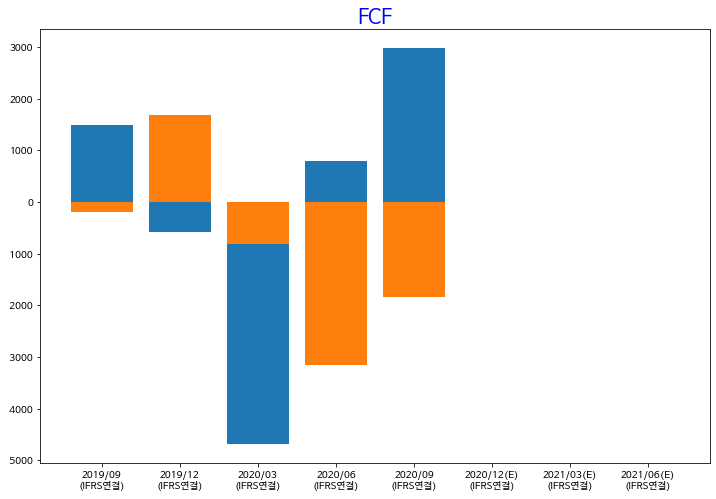

In [ ]:
num1 = '~'
num2 = '~'

#데이터의 dimension을 확인하세요.
print('df1의 dimension:',df1.shape)
print('df2의 dimension:',df2.shape)

#데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요. 
df1 = df1.fillna(0)
df2 = df2.fillna(0)

#각 데이터 별로 FCF의 값을 barplot으로 시각화하세요.
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

titleFont = {'fontsize' : 20, 'color' : '#0000ff'}
plt.figure(figsize=(12,8))
plt.rc('font', family='NanumBarunGothic') 
plt.bar(date1,df1['FCF'])
plt.bar(date2,df2['FCF'])
plt.title('FCF',fontdict=titleFont)

#0보다 큰 값 -> num1 , 0보다 작은 값 -> num2
num1 = len(df1.loc[df1['FCF'] > 0 ]) + len(df2.loc[df2['FCF'] > 0 ])
num2 = len(df1.loc[df1['FCF'] < 0 ]) + len(df2.loc[df2['FCF'] < 0 ])
print('num1: {0}, num2: {1}'.format(num1,num2))

## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [ ]:
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [ ]:
a = int('1234')
b = 5678
a+b

6912

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [ ]:
import seaborn as sns

pp = sns.load_dataset('penguins')
pp_crosstab = pd.crosstab(pp['species'],pp['sex'])
num3 = pp_crosstab.max().max()
num4 = pp_crosstab.min().min()

print('max:',num3)
print('min:',num4)

max: 73
min: 34


## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [ ]:
import os

def grade(df1, df2, num1, num2, num3, num4):
  score = 0
  
  score += (df1['매출액'][0] == 14753)
  score += (df2['매출액'][1] == 3728)

  score += (df1.shape == (8, 32))
  score += (df2.isnull().sum().sum() == 0)
  score += (num1 == 4 and num2 == 6)
  
  score += (num3 == 73 and num4 == 34)

  score += (os.listdir() == ['.config', 'df2.csv', 'df1.csv', 'sample_data'])

  score += (a+b == 6912)

  return(score)

In [ ]:
grade(df1, df2, num1, num2, num3, num4)

7


## 🔥 도전과제 

- 다음 데이터를 사용하여 아래와 동일한 그래프를 그리세요.

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/TSLA.csv>

<img src='https://i.imgur.com/UsS5JcZ.png'>



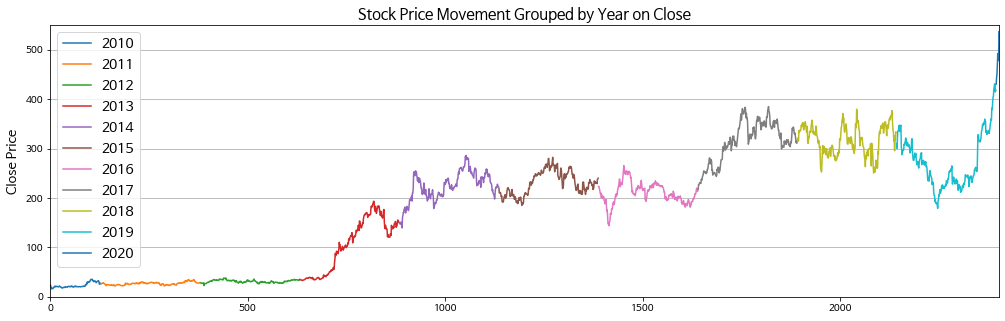

In [181]:
Tsla = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/TSLA.csv')

# Tsla['Date'] = pd.to_datetime(Tsla['Date']) #Datetime으로 형변환되면, 위의 그래프의 x축 매개변수로 들어가서 그래프가 생성될 수 없다!! 명심! 

#연도별로 그래프를 그리기 위해서 데이터프레임의 행을 기존의 Date컬럼의 원소로 치환 그리고 원소값들을 datetime의 형태로 변환시켜줌.
Tsla['New_Date'] = pd.to_datetime(Tsla['Date'])
# df['new_Date'] = pd.to_datetime(df['Date'])  #Date를 날짜변수로 변환
Tsla.set_index('New_Date',inplace=True)

#그래프 사이즈 조절
plt.figure(figsize=(17,5))

#x축과 y축 눈금의 min값, max값 설정
plt.axis([0,2400,0,550],fontsize = 20)
#xticks를 사용하지 않고, axis만 사용해서 코드를 실행시켰을 때 그래프가 나오는 시간이 많이 걸리던데 그 이유는 뭘까?

#x축의 눈금 레이블 지정! x축은 날짜 데이터의 값이 기준이기 때문에 500일을 눈금 간격으로 설정했다.
plt.xticks(np.arange(0,2400,500),(0,500,1000,1500,2000))

#grid, 가로축에만 생성
plt.grid(True,axis = 'y')

plt.plot(Tsla.loc['2010']['Date'],Tsla.loc['2010']['Close'],label='2010')
plt.plot(Tsla.loc['2011']['Date'],Tsla.loc['2011']['Close'],label='2011')
plt.plot(Tsla.loc['2012']['Date'],Tsla.loc['2012']['Close'],label='2012')
plt.plot(Tsla.loc['2013']['Date'],Tsla.loc['2013']['Close'],label='2013')
plt.plot(Tsla.loc['2014']['Date'],Tsla.loc['2014']['Close'],label='2014')
plt.plot(Tsla.loc['2015']['Date'],Tsla.loc['2015']['Close'],label='2015')
plt.plot(Tsla.loc['2016']['Date'],Tsla.loc['2016']['Close'],label='2016')
plt.plot(Tsla.loc['2017']['Date'],Tsla.loc['2017']['Close'],label='2017')
plt.plot(Tsla.loc['2018']['Date'],Tsla.loc['2018']['Close'],label='2018')
plt.plot(Tsla.loc['2019']['Date'],Tsla.loc['2019']['Close'],label='2019')
plt.plot(Tsla.loc['2020']['Date'],Tsla.loc['2020']['Close'],label='2020')
plt.title('Stock Price Movement Grouped by Year on Close',fontsize=15)
plt.ylabel('Close Price',fontsize='13')
plt.legend(prop={'size':14})

- penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

In [ ]:
#info를 통해 어떤 컬럼에 결측값이 있는지 확인이 가능하다.
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#위의 info를 통해 확인한 결측지 컬럼에서 결측치의 개수를 정확하게 알고 싶을 때!
pp['sex'].value_counts(dropna = False) 

Male      168
Female    165
NaN        11
Name: sex, dtype: int64

In [ ]:
#isnull()을 하게 되면 해당 원소가 결측지이면 True를 반환한다. 그리고 sum()을 통해 해당 컬럼의 결측치의 값을 확인해볼 수 있다.
pp.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
#결측치 제거!
pp = pp.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


((array([-2.87612769, -2.58380831, -2.41862248, -2.30107856, -2.20870765,
         -2.13204955, -2.06618977, -2.00823472, -1.95633124, -1.90921829,
         -1.8659974 , -1.82600492, -1.78873619, -1.75379814, -1.72087839,
         -1.68972444, -1.66012914, -1.63192035, -1.60495341, -1.57910555,
         -1.55427162, -1.53036086, -1.50729436, -1.48500306, -1.46342616,
         -1.44250985, -1.42220624, -1.40247256, -1.3832704 , -1.36456516,
         -1.34632554, -1.32852314, -1.31113211, -1.29412883, -1.27749168,
         -1.26120081, -1.24523794, -1.22958623, -1.21423007, -1.19915502,
         -1.18434768, -1.16979555, -1.15548702, -1.14141122, -1.12755801,
         -1.11391788, -1.1004819 , -1.08724171, -1.07418942, -1.06131761,
         -1.04861929, -1.03608784, -1.02371701, -1.0115009 , -0.99943391,
         -0.98751072, -0.97572629, -0.96407582, -0.95255477, -0.94115878,
         -0.92988373, -0.91872567, -0.90768084, -0.89674564, -0.88591664,
         -0.87519054, -0.86456419, -0.

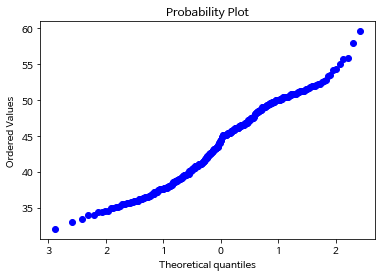

In [ ]:
#qqplot 그리기 (qqplot?)
import scipy.stats as stats
stats.probplot(pp['bill_length_mm'], plot=plt)

In [ ]:
#island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기
set(pp['island'])

{'Biscoe', 'Dream', 'Torgersen'}